In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# store filepath 
fileOne = "Resources/combined_data.csv"
fileTwo = "Resources/staffDemographics18_19.txt"

In [3]:
#read csv files
dtypes = {'CDSCode': 'int64', 'Percentage Standard Met and Above': 'float64', 'Percentage Standard Nearly Met': 'float64', 'Percentage Standard Not Met': 'float64'}
combinedData_df = pd.read_csv(fileOne, dtype=dtypes, na_values="*", encoding="utf-8")
staffDemo_df = pd.read_csv(fileTwo, delimiter='\t')

In [4]:
combinedData_df.head()

,CDSCode,CAASPP Reported Enrollment,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,School,County,Charter,Magnet,EILCode
0,1100176001788,93.0,88.0,10.34,20.69,31.03,24.14,44.83,87.0,Cox Academy,Alameda,Y,N,ELEM
1,1100176001788,93.0,92.0,8.70,19.57,28.26,27.17,44.57,92.0,Cox Academy,Alameda,Y,N,ELEM
2,1100176001788,98.0,93.0,5.38,17.20,22.58,19.35,58.06,93.0,Cox Academy,Alameda,Y,N,ELEM
3,1100176001788,98.0,95.0,4.21,23.16,27.37,28.42,44.21,95.0,Cox Academy,Alameda,Y,N,ELEM
4,1100176001788,91.0,90.0,4.44,16.67,21.11,26.67,52.22,90.0,Cox Academy,Alameda,Y,N,ELEM


In [5]:
staffDemo_df.head()

,AcademicYear,RecID,DistrictCode,CountyName,DistrictName,GenderCode,Age,EducationLevel,EthnicGroup,YearsTeaching,YearsInDistrict,EmploymentStatusCode,FTE Teaching,FTE administrative,FTE PupilServices,FileCreated
0,1819,1012660,1075234,FRESNO,Golden Plains Unified,F,51,C,7,15,13,T,100.0,0.0,0.0,08/22/2019
1,1819,1323744,1075234,FRESNO,Golden Plains Unified,M,62,C,7,33,33,T,100.0,0.0,0.0,08/22/2019
2,1819,1070768,1075234,FRESNO,Golden Plains Unified,F,59,C,7,33,31,T,100.0,0.0,0.0,08/22/2019
3,1819,1319448,1075234,FRESNO,Golden Plains Unified,F,55,C,7,32,32,T,100.0,0.0,0.0,08/22/2019
4,1819,1000417987,1075234,FRESNO,Golden Plains Unified,F,27,B,5,3,3,P,100.0,0.0,0.0,08/22/2019


In [6]:
# find datatypes for dataframes
staffDemo_df.dtypes

AcademicYear              int64
RecID                     int64
DistrictCode              int64
CountyName               object
DistrictName             object
GenderCode               object
Age                       int64
EducationLevel           object
EthnicGroup               int64
YearsTeaching             int64
YearsInDistrict           int64
EmploymentStatusCode     object
FTE Teaching            float64
FTE administrative      float64
FTE PupilServices       float64
FileCreated              object
dtype: object

In [7]:
#add a new column named DistrictCode which is the first 7 digits of CDS code
combinedData_df['DistrictCode'] = combinedData_df['CDSCode'].astype(str).str[:7].astype(int)
combinedData_df.head()

,CDSCode,CAASPP Reported Enrollment,Students Tested,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,School,County,Charter,Magnet,EILCode,DistrictCode
0,1100176001788,93.0,88.0,10.34,20.69,31.03,24.14,44.83,87.0,Cox Academy,Alameda,Y,N,ELEM,1100176
1,1100176001788,93.0,92.0,8.70,19.57,28.26,27.17,44.57,92.0,Cox Academy,Alameda,Y,N,ELEM,1100176
2,1100176001788,98.0,93.0,5.38,17.20,22.58,19.35,58.06,93.0,Cox Academy,Alameda,Y,N,ELEM,1100176
3,1100176001788,98.0,95.0,4.21,23.16,27.37,28.42,44.21,95.0,Cox Academy,Alameda,Y,N,ELEM,1100176
4,1100176001788,91.0,90.0,4.44,16.67,21.11,26.67,52.22,90.0,Cox Academy,Alameda,Y,N,ELEM,1100176


In [8]:
# find datatypes for dataframes
combinedData_df.dtypes

CDSCode                                int64
CAASPP Reported Enrollment           float64
Students Tested                      float64
Percentage Standard Exceeded         float64
Percentage Standard Met              float64
Percentage Standard Met and Above    float64
Percentage Standard Nearly Met       float64
Percentage Standard Not Met          float64
Students with Scores                 float64
School                                object
County                                object
Charter                               object
Magnet                                object
EILCode                               object
DistrictCode                           int32
dtype: object

In [9]:
# calculate average test scores per district code
combinedData_df[['Percentage Standard Met and Above', 'Percentage Standard Nearly Met', 'Percentage Standard Not Met']]= combinedData_df[['Percentage Standard Met and Above','Percentage Standard Nearly Met', 'Percentage Standard Not Met']].apply(pd.to_numeric, errors='coerce')
districtGroups_df = combinedData_df.groupby('DistrictCode', as_index=False)[['Percentage Standard Met and Above', 
        'Percentage Standard Nearly Met', 'Percentage Standard Not Met']].mean()
districtGroups_df

,DistrictCode,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met
0,1010108,17.499583,19.604583,62.895833
1,1061994,38.125714,29.838571,32.036429
2,1062026,53.575000,26.190000,20.240000
3,1062042,30.586429,34.031429,35.380714
4,1062109,74.205000,20.277857,5.517857
...,...,...,...,...
984,9619526,49.917083,27.598333,22.483750
985,9619606,36.676250,33.279375,30.044375
986,9619786,69.387250,20.755500,9.857750
987,9619866,NaN,NaN,NaN


In [10]:
# calculate average test scores per district code
staffGroups_df = staffDemo_df.groupby('DistrictCode', as_index=False)['YearsTeaching'].mean()
staffGroups_df

,DistrictCode,YearsTeaching
0,110017,10.829268
1,131609,13.804348
2,131617,15.225564
3,161119,13.018950
4,161127,13.008772
...,...,...
1026,5872728,13.783784
1027,5872736,12.470356
1028,5872744,10.797468
1029,5872751,15.720000


In [11]:
# merge districtGroups_df and staffGroups_df on DistrictCode column
staffCombined_df = pd.merge(districtGroups_df, staffGroups_df, on='DistrictCode')
staffCombined_df

,DistrictCode,Percentage Standard Met and Above,Percentage Standard Nearly Met,Percentage Standard Not Met,YearsTeaching
0,1010108,17.499583,19.604583,62.895833,13.143145
1,1061994,38.125714,29.838571,32.036429,13.692308
2,1062026,53.575000,26.190000,20.240000,20.000000
3,1062042,30.586429,34.031429,35.380714,6.750000
4,1062109,74.205000,20.277857,5.517857,13.923077
...,...,...,...,...,...
903,5810587,8.030000,11.956000,80.014000,11.505376
904,5872728,38.415000,28.750556,32.835556,13.783784
905,5872736,33.760685,28.512329,37.727671,12.470356
906,5872751,47.632857,30.226786,22.139643,15.720000


The r-squared is: 0.07700916732291976


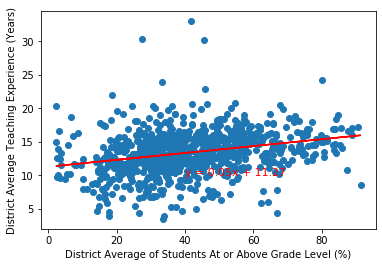

In [26]:
# generate scatter plot showing mean percentage passing score by district against mean years teaching experience by district
PassingandAbove_df = staffCombined_df[staffCombined_df['Percentage Standard Met and Above']>0]
x_values = PassingandAbove_df['Percentage Standard Met and Above']
y_values = PassingandAbove_df['YearsTeaching']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=11,color="red")
plt.xlabel('District Average of Students At or Above Grade Level (%)')
plt.ylabel('District Average Teaching Experience (Years)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
# the r-squared value would seem to indicate that there is a weak correlation, if any, between teacher salaries and passing test
# scores. However, in this case, the sample is skewed, in that it only inlcudes passing scores and above. It would seem, that
# within that group, teacher experience has little correlation with improved test scores. 

The r-squared is: 0.07723985362529896


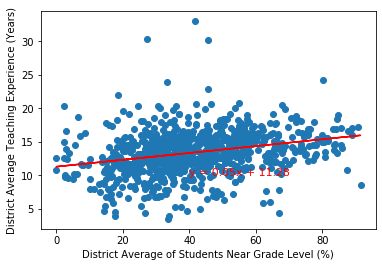

In [27]:
# generate scatter plot showing mean percentage nearly passing score by district against mean years teaching experience by district
nearlyPassing_df = staffCombined_df[staffCombined_df['Percentage Standard Nearly Met']>0]
x_values = nearlyPassing_df['Percentage Standard Met and Above']
y_values = nearlyPassing_df['YearsTeaching']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=11,color="red")
plt.xlabel('District Average of Students Near Grade Level (%)')
plt.ylabel('District Average Teaching Experience (Years)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# the r-squared value would seem to indicate that there is a weak correlation, if any, between teacher salaries and near passing test
# scores. However, in this case, the sample is skewed, in that it only inlcudes near passing scores and above. It would seem, 
# that within that group, teacher experience has little correlation with improved test scores. 

The r-squared is: 0.05669386345384158


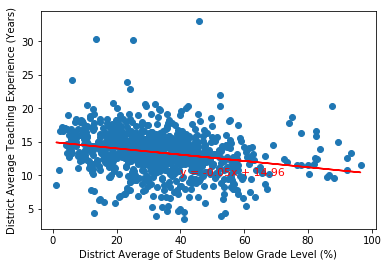

In [28]:
# generate scatter plot showing mean percentage not passing test score by district against mean years teaching experience by district
notPassing_df = staffCombined_df[staffCombined_df['Percentage Standard Not Met']>0]
x_values = notPassing_df['Percentage Standard Not Met']
y_values = notPassing_df['YearsTeaching']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=11,color="red")
plt.xlabel('District Average of Students Below Grade Level (%)')
plt.ylabel('District Average Teaching Experience (Years)')
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [ ]:
# the r-squared value would seem to indicate that there is a weak correlation, if any, between teacher salaries and passing test
# scores. However, in this case, the sample is skewed, in that it only inlcudes failing test scores. It would seem, that
# within that group, teacher experience has little correlation with improved test scores. 